# Importing All Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm, uniform
import scipy.integrate as integrate
from scipy.integrate import quad
%matplotlib inline


Reading csv file and coverting into Dataframe

In [2]:
data = pd.read_csv('NDAP_REPORT_7004.csv')
data_auto=pd.read_csv('Automobile_data.csv')

nd=pd.DataFrame(data)
df_auto=pd.DataFrame(data_auto)

In [3]:
nd  #printing Dataframe

,Rowid,Country,State lgd code,State,District lgd code,District,Year,Type of residence namely rural or urban,Number of census houses,Houses having grass or thatch or bamboo etc. as material of wall,Houses having plastic or polythene as material of wall,Houses having mud or unburnt brick as material of wall,Houses having wood as material of wall,Houses having stone not packed with mortar as material of wall,Houses having stone packed with mortar as material of wall,Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall,Houses having burnt brick as material of wall,Houses having concrete as material of wall,Houses having any other material of wall
0,1,India,1,Jammu And Kashmir,1,Anantnag,2011,Rural,109465,270,1331,22710.000000,3014.00000,3034.000000,480.000000,229.000000,76229.00000,1400.000000,768.000000
1,2,India,1,Jammu And Kashmir,1,Anantnag,2011,Urban,33522,69,121,6807.000000,123.00000,268.000000,93.000000,98.000000,23789.00000,1894.000000,260.000000
2,3,India,1,Jammu And Kashmir,2,Budgam,2011,Rural,85561.57321,134.1822704,168.9702664,7174.278724,960.14869,748.438886,306.134365,214.691633,73342.04111,1013.821599,1498.865657
3,4,India,1,Jammu And Kashmir,2,Budgam,2011,Urban,13136,49,27,935.000000,24.00000,187.000000,30.000000,39.000000,11297.00000,454.000000,94.000000
4,5,India,1,Jammu And Kashmir,3,Baramulla,2011,Rural,120312.4268,410.8177296,173.0297336,19207.721280,3227.85131,12552.561110,5479.865635,1740.308367,72686.95889,2118.178401,2715.134343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,1469,India,38,The Dadra And Nagar Haveli And Daman And Diu,463,Daman,2011,Urban,42352,202,150,426.000000,95.00000,72.000000,185.000000,130.000000,39160.00000,1927.000000,5.000000
1469,1470,India,38,The Dadra And Nagar Haveli And Daman And Diu,464,Diu,2011,Rural,5410,6,0,50.000000,2.00000,238.000000,5094.000000,0.000000,2.00000,5.000000,13.000000
1470,1471,India,38,The Dadra And Nagar Haveli And Daman And Diu,464,Diu,2011,Urban,5279,11,1,6.000000,0.00000,165.000000,4820.000000,11.000000,147.00000,116.000000,2.000000
1471,1472,India,38,The Dadra And Nagar Haveli And Daman And Diu,465,Dadra And Nagar Haveli,2011,Rural,35408,16428,62,4939.000000,145.00000,113.000000,74.000000,96.000000,12642.00000,897.000000,12.000000


# Cleaning DataFrame

In [4]:
df=nd.dropna()  #Creating new dataframe by dropping nan values

In [5]:
#Replacing string zero by int 0
for i in range(0,19):
    df[df.columns[i]]= df[df.columns[i]].replace("zero",0)

C:\Users\Hemant\AppData\Local\Temp\ipykernel_4628\2218113123.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns[i]]= df[df.columns[i]].replace("zero",0)


In [6]:
#Converting Object Datatype to float64 Datatype
for i in range(8,11):
   df[df.columns[i]] = df[df.columns[i]].astype('float64')
df.dtypes

C:\Users\Hemant\AppData\Local\Temp\ipykernel_4628\2577565828.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns[i]] = df[df.columns[i]].astype('float64')


Rowid                                                                                          int64
Country                                                                                       object
State lgd code                                                                                 int64
State                                                                                         object
District lgd code                                                                              int64
District                                                                                      object
Year                                                                                           int64
Type of residence namely rural or urban                                                       object
Number of census houses                                                                      float64
Houses having grass or thatch or bamboo etc. as material of wall                           

In [7]:
#Removing rows having zero Number of census houses
df2=df[df['Number of census houses'] != 0]

In [8]:
#Adding new column having percentage
for i in range(1,11):      #For each column
    df2['New'+str(i)]=(df2.iloc[:,i+8])/(df2['Number of census houses'])*100

C:\Users\Hemant\AppData\Local\Temp\ipykernel_4628\1700946099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['New'+str(i)]=(df2.iloc[:,i+8])/(df2['Number of census houses'])*100
C:\Users\Hemant\AppData\Local\Temp\ipykernel_4628\1700946099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['New'+str(i)]=(df2.iloc[:,i+8])/(df2['Number of census houses'])*100
C:\Users\Hemant\AppData\Local\Temp\ipykernel_4628\1700946099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

# Making a new dataframe for 'Houses having mud or unburnt brick as material of wall' and related columns

In [9]:
df3 = df2[['Rowid', 'Houses having mud or unburnt brick as material of wall','New3']].copy()

#Renaming column

df3.rename(columns = {'New3':'% Houses having mud or unburnt brick as material of wall'}, inplace = True)

#Sorting in ascending order

df3=df3.sort_values(by='% Houses having mud or unburnt brick as material of wall',ascending=True).reset_index()


# Making QQ Plot for Gaussian Distribution

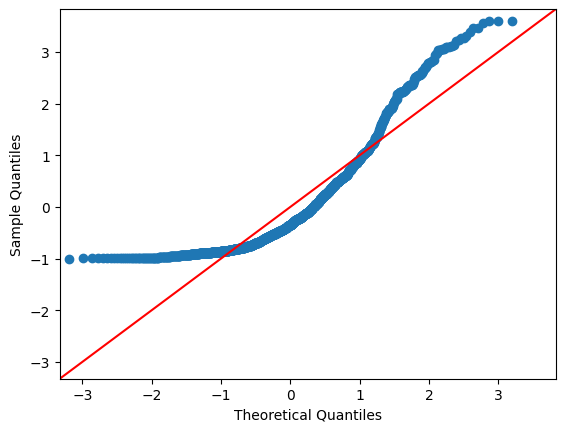

In [10]:
x=df3['% Houses having mud or unburnt brick as material of wall'].to_numpy()
qqplot(x,norm,fit=True,line="45")
plt.show()

# Making QQ Plot for Uniform Distribution

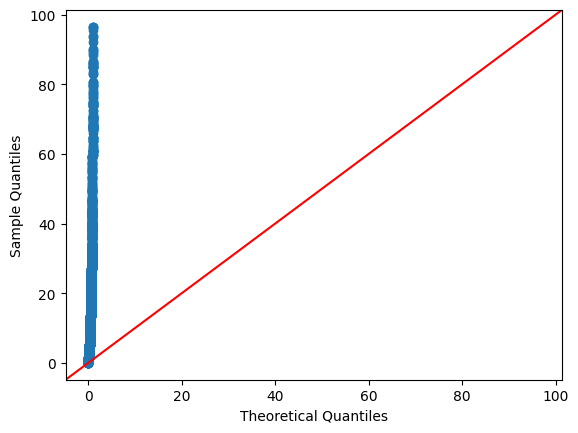

In [11]:
qqplot(x,uniform,fit=True,line="45")
plt.show()

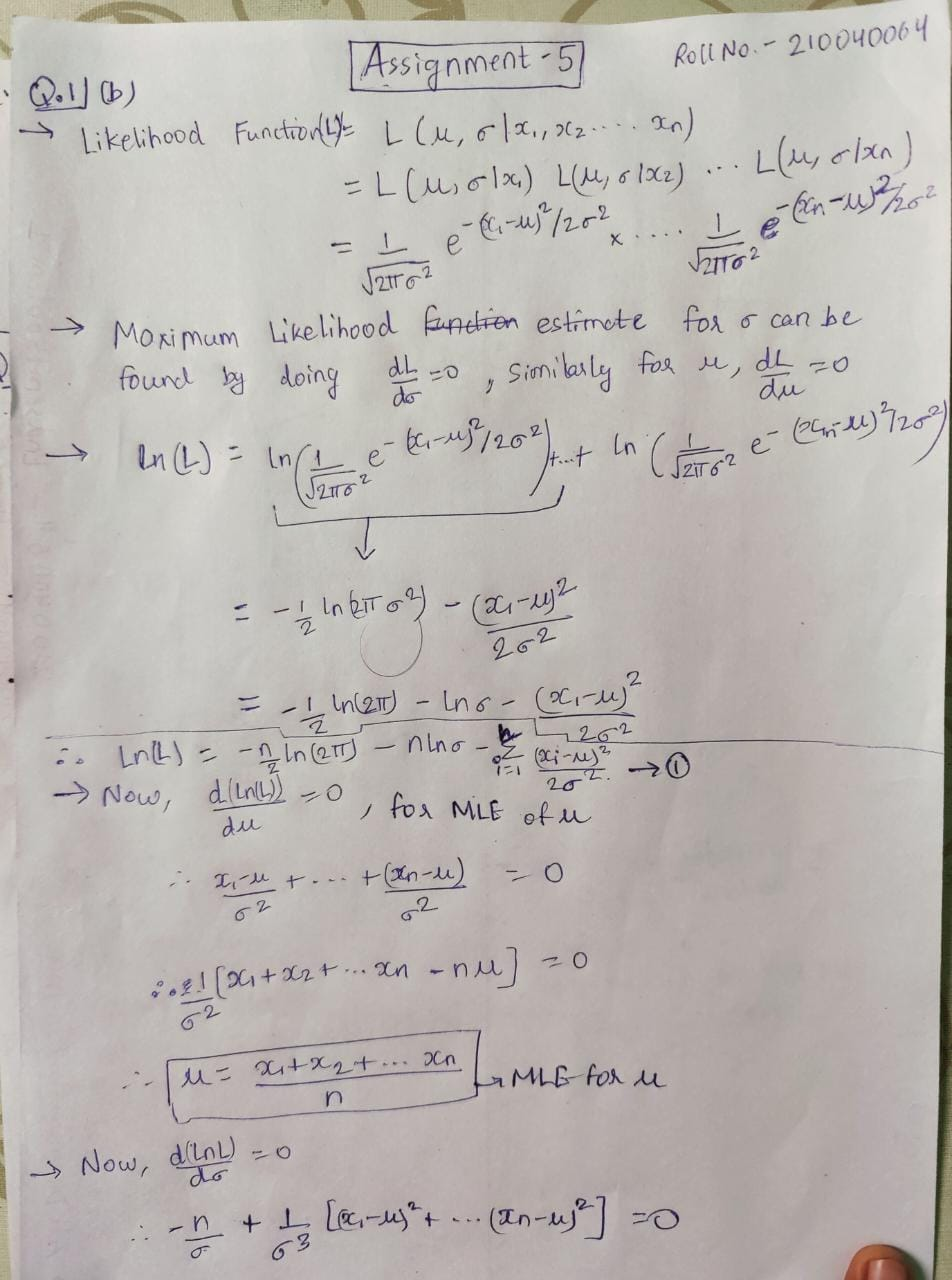

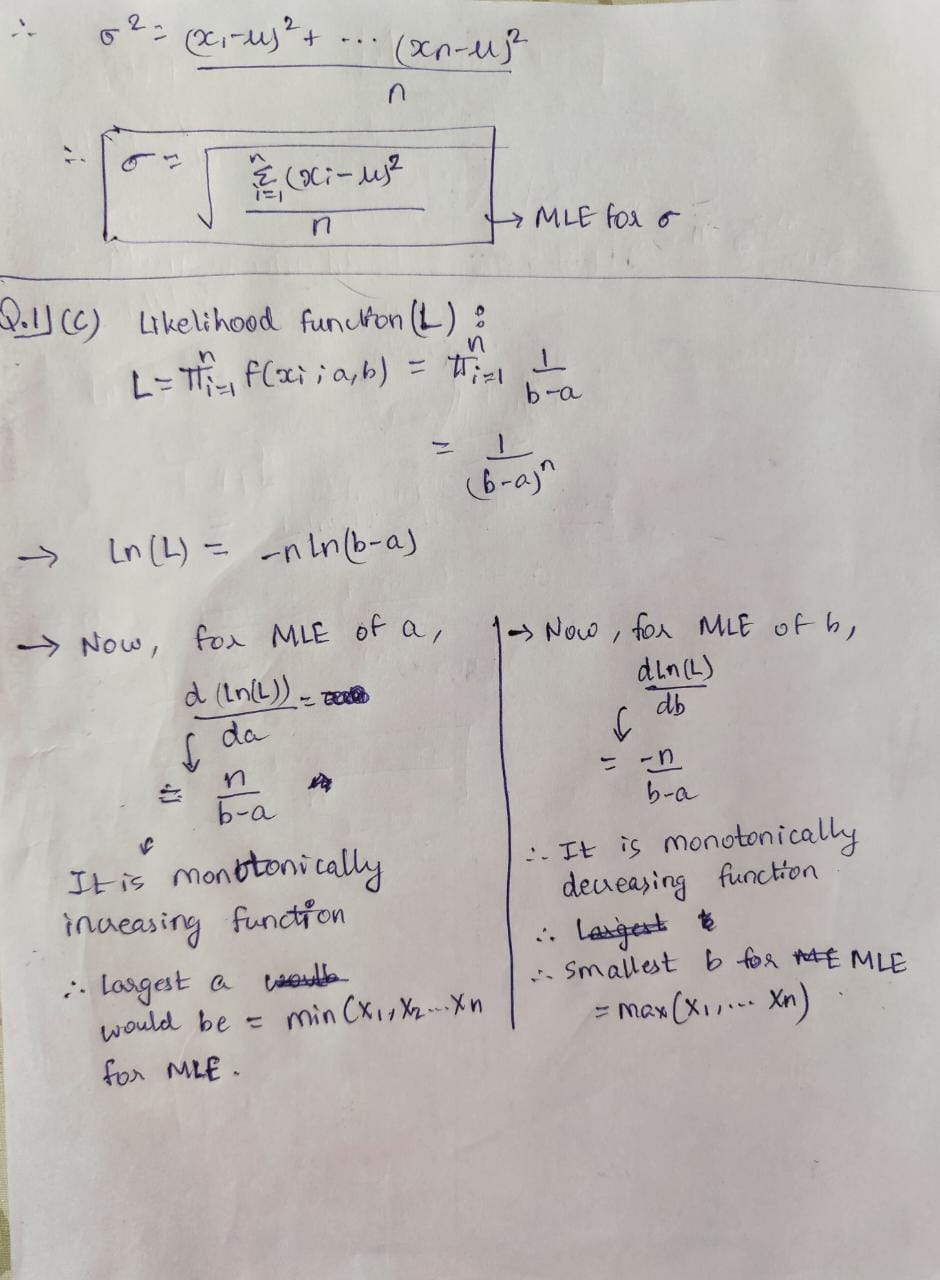

# For Question 1(d) as we can see from the QQ plot that the Gaussian Distribution is more nearer to 45 deg line than the Uniform Distribution.Therefore Gaussian Distribution is more likely to explain the observed data

# MLE for Normal and Uniform Distribution

In [12]:
#Finding mean and standard deviation

len_of_x=len(x)
# print(len_of_x)


def mean_mle(p):
    mean=(p.sum())/len_of_x
    return mean


def sdev_mle(q,mean):
    s=0
    for i in range(len(q)):
        s=s+(q[i]-mean)*(q[i]-mean)
    var=s/len_of_x
    sdev=math.sqrt(var)
    return sdev


mean=mean_mle(x)
# print(mean)

s_dev=sdev_mle(x,mean)
# print(s_dev)


Calculation probability density using mean and st. deviation

In [13]:
def prob_dens_n(x, mean , s_dev):
    den=(np.sqrt(2*(math.pi)))*s_dev
    num= np.exp(-0.5*((x-mean)/s_dev)**2)
    return num/den


prob_density_n=prob_dens_n(x,mean,s_dev)

# print(prob_density_n)

# Plotting PDF of Gaussian Dist.

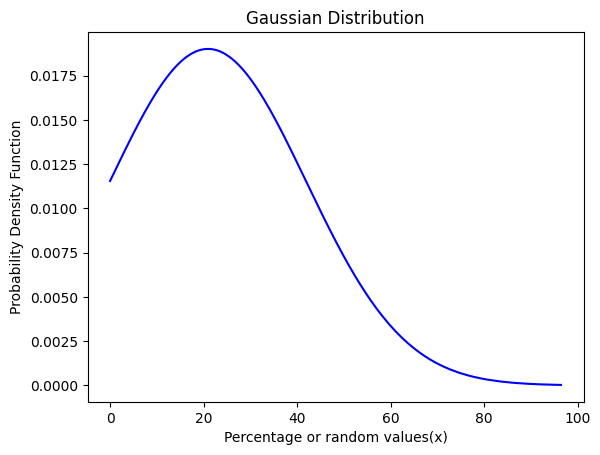

In [14]:
plt.plot(x,prob_density_n,color = 'blue')
plt.xlabel('Percentage or random values(x)')
plt.ylabel('Probability Density Function')
plt.title("Gaussian Distribution")
plt.show()


Calculation PDF for Uniform Dist.

In [15]:
def prob_dens_u(x):
    min_x=np.min(x)
    max_x=np.max(x)
    y=1/(max_x-min_x)
    arr=[]
    for i in range(len(x)):
        arr.append(y)
    return arr

prob_density_u=prob_dens_u(x)

# Plotting PDF of Uniform Dist.

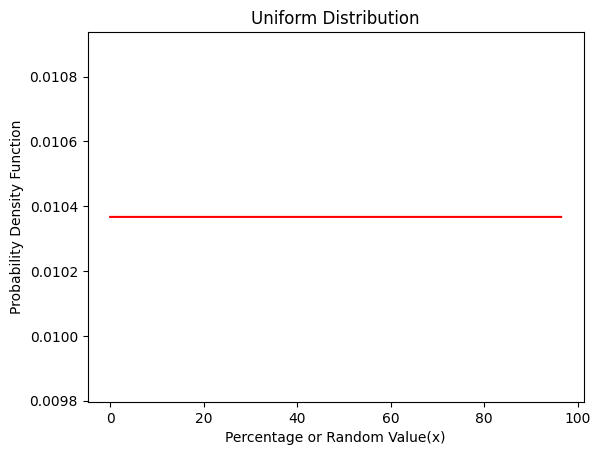

In [16]:

plt.plot(x,prob_density_u , color = 'red')
plt.xlabel('Percentage or Random Value(x)')
plt.ylabel('Probability Density Function')
plt.title("Uniform Distribution")
plt.show()

# Starting Question 2

Plottin the PDF of given function p(x)=1-abs(x)

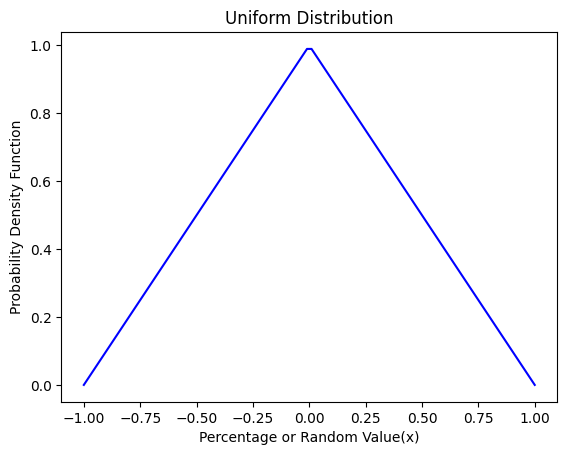

In [17]:
#Making a line y=1-abs(x) using linspace function

#Selecting 100 values between -1 to 1
x1=np.linspace(-1,1,100)

plt.plot(x1,1-abs(x1), color = 'blue')
plt.xlabel('Percentage or Random Value(x)')
plt.ylabel('Probability Density Function')
plt.title("Uniform Distribution")
plt.show()

Now making CDF function from PDF 

Text(0.5, 1.0, 'Cumulative Density Function')

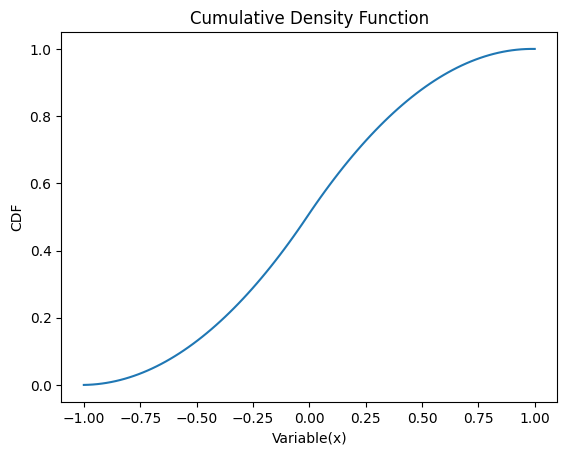

In [18]:
#First calculating CDF from 100 values we have already selected before
s=0
cdf_store=[]


for i in range(0,100):
    s=s+((1-abs(x1[i]))*2/99)
    cdf_store.append(s)
    
    
plt.plot(x1,cdf_store)
plt.xlabel('Variable(x)')
plt.ylabel('CDF')
plt.title("Cumulative Density Function")   

In [19]:
#storing percentile of dataset x
st=np.zeros(100) 
for i in range(0,100):
    st[i]=(np.percentile(x,i))

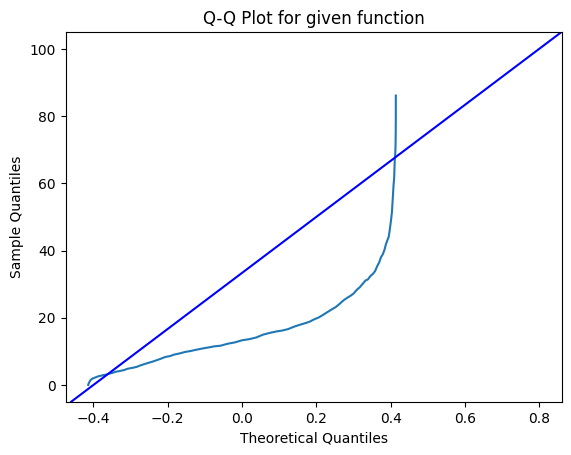

In [20]:
#Now finding inverse cdf_store to find percentile
def inv_cdf_store(cdf_store):
    v=np.zeros(len(cdf_store))
    for i in range(0,len(cdf_store)):
        if cdf_store[i]>0.5:
            v[i]=(-1+ math.sqrt(2*(cdf_store[i])))
        else:
            v[i]=(1-math.sqrt(2-2*(cdf_store[i])))
    return v

per_tile=inv_cdf_store(cdf_store)


plt.plot(per_tile,st)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title("Q-Q Plot for given function")
plt.axline([-0.4, 0], [0.8, 100], color='blue') 


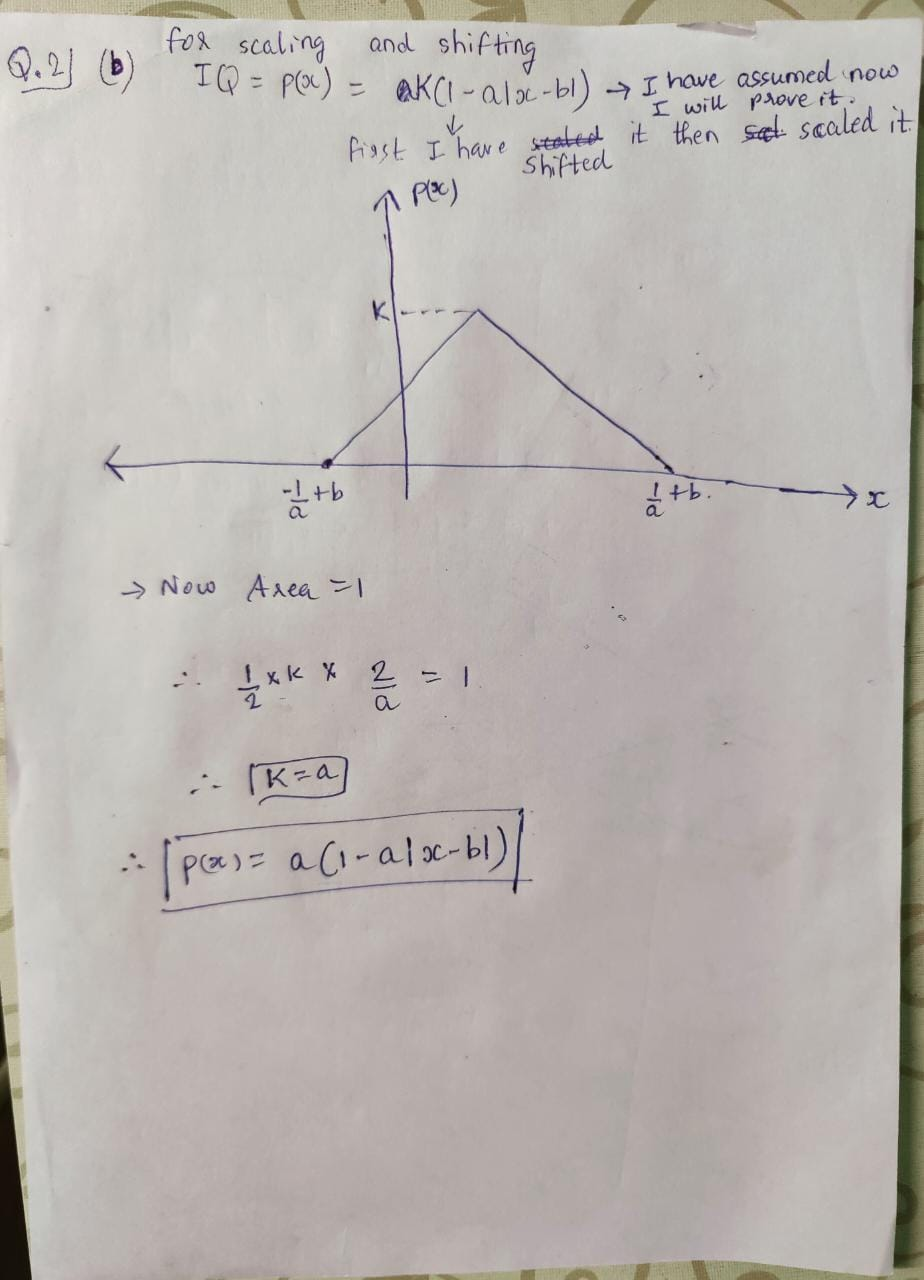

# Predicting correct type of test

# The given data has two continuous variables and we have to find relation between percentage for fixed sample size.Therefore I will use Independent Two Sample TT Test

H0(Null Hypothesis)= No difference in percent of mud/unburnt brick houses in rural or urban

H1(Alternate Hypothesis)=difference in percent of mud/unburnt brick houses in rural or urban maybe small or large

In [21]:
#Making a new dataframe for storing 'Houses having mud or unburnt brick as material of wall' and related columns

df4 = df2[['Type of residence namely rural or urban', 'Houses having mud or unburnt brick as material of wall','New3']].copy()

#Renaming the column
df4.rename(columns = {'New3':'% Houses having mud or unburnt brick as material of wall'}, inplace = True)

#Making dataframe for rural values only
df_rural = df4[df4['Type of residence namely rural or urban']=='Rural']

#Making dataframe for urban values only
df_urban = df4[df4['Type of residence namely rural or urban']=='Urban']

#Seperating percentage column
rural_column=(df_rural['% Houses having mud or unburnt brick as material of wall'])
urban_column=(df_urban['% Houses having mud or unburnt brick as material of wall'])


In [30]:
#Calculating p value
_,p_value=stats.ttest_ind(a=rural_column,b=urban_column,equal_var=False,alternative='greater')
# stats.ttest_ind(a=rural_column, b=urban_column, equal_var=True)

In [32]:
print(p_value)

6.986818169096519e-45


In [33]:
#We generally take threshold value of p to be 0.05
if p_value < 0.05:    
    print(" Rejecting the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

 Rejecting the null hypothesis


# To check whether we can predict the urban data from rural or vice- versa
Using Pearson Correlation, as higher correlation shows that the two variables are related strongly and sign shows the direction as follows:

+ve and close to 1 : Two variables are strongly related and increase in one causes increase in another

-ve & close to -1 :Two variables are strongly related and increase in one causes decrease in another

-ve & close to 0:Two variables are weakly related and increase in one causes decrease in another +ve &close to 0 :Two variables are weakly related and increase in one causes increase in another

In [26]:
zipped = list(zip(rural_column,urban_column))         #using a zip function to combine both rural and urban values and making a new dataframe from it
pear_corr = pd.DataFrame(zipped, columns=['% Rural','% Urban'])
# pear_corr

,% Rural,% Urban
0,20.746357,20.306068
1,8.384931,7.117844
2,15.964869,14.729570
3,4.367594,7.086093
4,10.070516,2.956932
...,...,...
705,44.377581,39.638989
706,31.091567,89.736544
707,31.175574,1.005856
708,28.072993,0.113658


Making pearson correlation Matrix

In [35]:
matrix = pear_corr.corr()
 
print("Correlation Matrix is : ")
print(matrix)

Correlation Matrix is : 
          % Rural   % Urban
% Rural  1.000000  0.341851
% Urban  0.341851  1.000000


# Comparing Two Categorical Variables:
Here we are using Chi-Square Test as it is generally used for comparing categorical values

In [28]:
data_chi_sq=pd.crosstab(df_auto['body-style'],df_auto['drive-wheels'])

In [29]:
data_chi_sq

drive-wheels,4wd,fwd,rwd
body-style,,,
convertible,0,1,5
hardtop,0,1,7
hatchback,2,49,19
sedan,3,57,36
wagon,4,12,9


# References:
1.https://www.statisticshowto.com/q-q-plots/
2.https://nathancarter.github.io/how2data/site/how-to-create-a-qq-plot/
3.https://stackoverflow.com/questions/35978165/a-numpy-array-unexpectedly-changes-when-changing-another-one-despite-being-separ
4.https://stats.stackexchange.com/questions/427749/qq-plot-comparison-of-z-normalized-datasets
5.https://stackoverflow.com/questions/55724501/generate-a-random-number-according-to-a-specific-distribution-with-a-function
6.https://online.stat.psu.edu/stat414/lesson/14/14.3
7.https://www.youtube.com/watch?v=Ky7QeVgv-BA&t=325
8.https://www.youtube.com/watch?v=4Fta6KQ1QHQ&ab_channel=KrishNaik